#### Visualización una imágen de cada tipo de los 3 datasets.

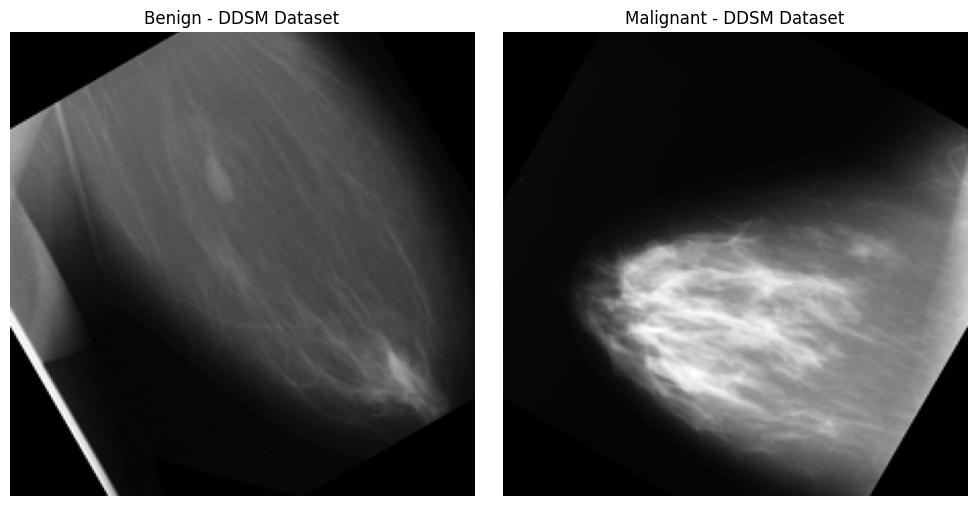

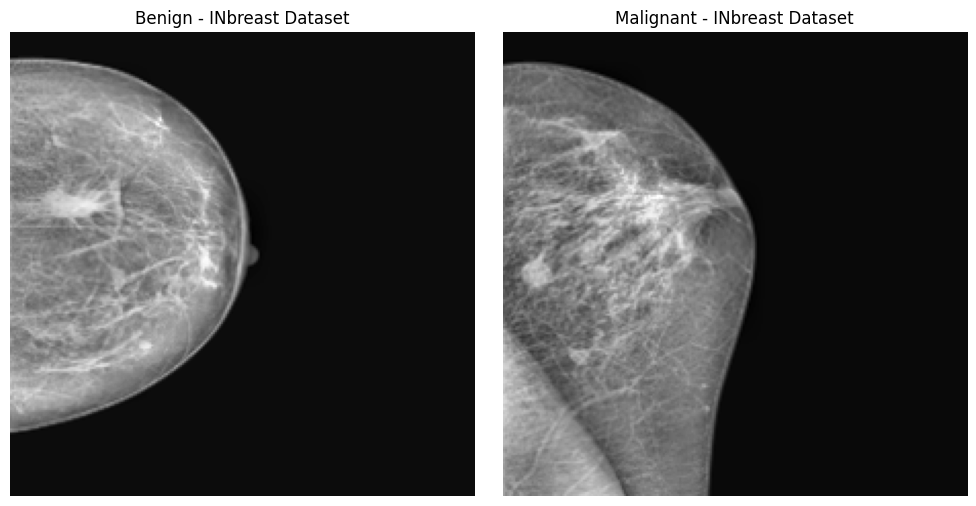

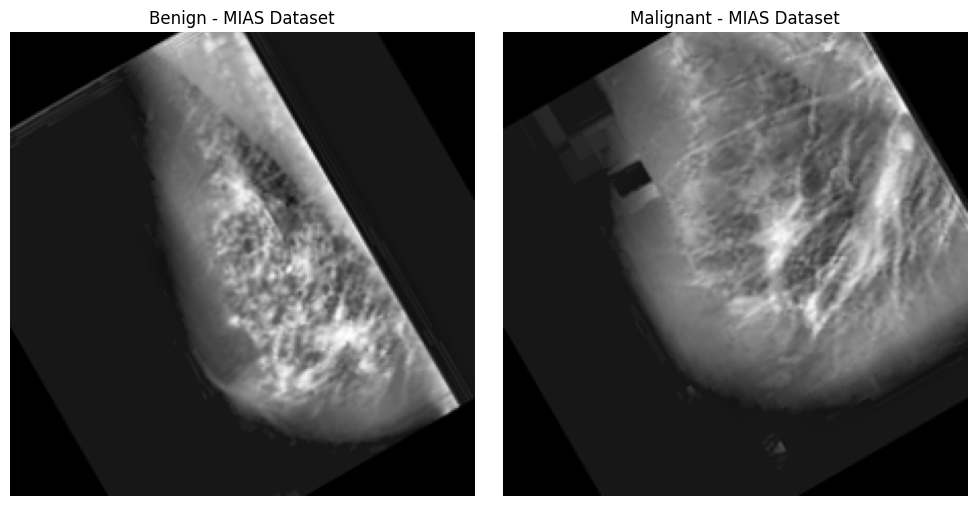

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Ruta del CSV
csv_path = '/Volumes/m2/Memoria/Code/PMM/BeningMalignant_Masses-Preprocessing/data/processed/csv/BeningMalignant_Masses.csv'

# Ruta base de las imágenes
base_image_path = '/Volumes/m2/Memoria/Code/PMM/BeningMalignant_Masses-Preprocessing/data/original/BeningMalignant_Masses'

# Leer el CSV
df = pd.read_csv(csv_path)

# Función para mostrar imágenes
def show_images_for_dataset(df, dataset_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Crear un subgráfico con 2 imágenes (1 benigna, 1 maligna)
    
    # Mostrar imagen benigna
    benign_df = df[(df['dataset'] == dataset_name) & (df['split'] == 'Benign Masses')]
    if not benign_df.empty:
        benign_sample = benign_df.sample(n=1).iloc[0]  # Seleccionar una imagen aleatoria
        benign_img_path = os.path.join(base_image_path, benign_sample['dataset'], benign_sample['split'], benign_sample['image_name'])
        benign_img = Image.open(benign_img_path)
        axes[0].imshow(benign_img, cmap='gray')
        axes[0].axis('off')
        axes[0].set_title(f"Benign - {benign_sample['dataset']}")
    else:
        axes[0].axis('off')
        axes[0].set_title("No benign images found")

    # Mostrar imagen maligna
    malignant_df = df[(df['dataset'] == dataset_name) & (df['split'] == 'Malignant Masses')]
    if not malignant_df.empty:
        malignant_sample = malignant_df.sample(n=1).iloc[0]  # Seleccionar una imagen aleatoria
        malignant_img_path = os.path.join(base_image_path, malignant_sample['dataset'], malignant_sample['split'], malignant_sample['image_name'])
        malignant_img = Image.open(malignant_img_path)
        axes[1].imshow(malignant_img, cmap='gray')
        axes[1].axis('off')
        axes[1].set_title(f"Malignant - {malignant_sample['dataset']}")
    else:
        axes[1].axis('off')
        axes[1].set_title("No malignant images found")

    plt.tight_layout()
    plt.show()

# Mostrar una imagen benigna y una maligna de cada dataset
datasets = ['DDSM Dataset', 'INbreast Dataset', 'MIAS Dataset']
for dataset in datasets:
    show_images_for_dataset(df, dataset)
